In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
file_path = ("/content/CMG.csv" )
data = pd.read_csv(file_path, delimiter=',')

In [3]:
# Xem data
data


,Date,Price
0,12/15/2016,9602.3
1,12/16/2016,9352.8
2,12/19/2016,9352.8
3,12/21/2016,9415.2
4,12/23/2016,9321.7
...,...,...
1739,12/11/2023,38850.0
1740,12/12/2023,39000.0
1741,12/13/2023,38900.0
1742,12/14/2023,38900.0


In [4]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.6 MB/s eta 0:00:00


## **TRAIN - TEST: 8 : 2**

---



In [11]:
#1. split data into train, test sets with a ratio of 8:2
train_size = int(0.8 * len(data))
test_size =len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [12]:
# 2. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22374.660, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22392.745, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22382.728, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22381.187, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22393.126, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22381.186, Time=0.90 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22379.509, Time=1.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22370.753, Time=3.86 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22377.407, Time=0.84 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=22376.633, Time=1.40 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=22372.479, Time=4.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22370.575, Time=4.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=22377.258, Time=1.46 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=22376.008, Time=2.13 sec
 ARIMA(1,1,4)(0,0,0

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [13]:
# 3. Testing proccess
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [14]:
# 4. The process of creating index predicts the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[52483.13747842 52622.87993337 52646.52337411 52513.46980994
 52493.85084195 52620.47462803 52636.41184153 52515.96481512
 52503.38960665 52617.90662617 52627.41792399 52518.590559
 52511.86548357 52615.23704448 52619.43436653 52521.29133235
 52519.38138663 52612.51655454 52612.36247931 52524.02115301
 52526.0318999  52609.78677693 52606.11166489 52526.74245343
 52531.90375369 52607.08151627 52600.5989406  52529.42491932
 52537.07630212 52604.42785266]


In [15]:
# 5. Evaluate the accuracy of testing
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
test_rmse = np.sqrt(MSE(y_test, y_pred))
test_mape = MAPE(y_test, y_pred)*100
test_mae = MAE(y_test, y_pred)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 9577.450480610838
Testing MAPE: 20.316851647866653
Testing MAE: 8440.763038791169


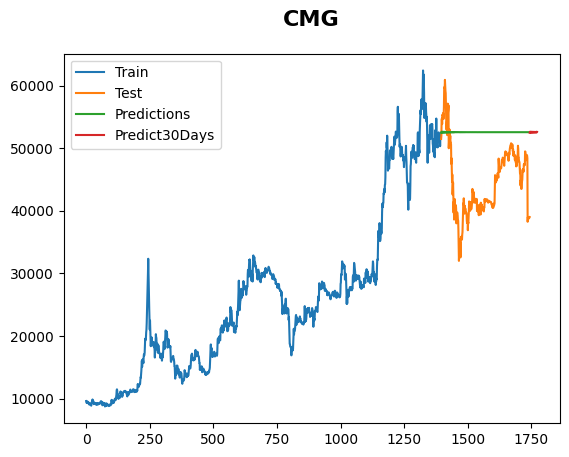

In [16]:
# 6. Draw
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Predict30Days'])
plt.title('CMG', fontweight='bold', fontsize=16, pad=20)
plt.show()

## **TRAIN - TEST: 7 : 3**

---



In [5]:
#1. split data into train, test sets with a ratio of 7:3
train_size = int(0.7 * len(data))
test_size =len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [6]:
# 2. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19027.626, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19056.083, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19027.269, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19026.398, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19058.153, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19028.344, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=19028.350, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19030.366, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=19027.367, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.601 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [7]:
# 3. Testing proccess
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [8]:
# 4. The process of creating index predicts the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[51775.93959027 51805.77153684 51835.6034834  51865.43542997
 51895.26737653 51925.0993231  51954.93126966 51984.76321622
 52014.59516279 52044.42710935 52074.25905592 52104.09100248
 52133.92294905 52163.75489561 52193.58684217 52223.41878874
 52253.2507353  52283.08268187 52312.91462843 52342.746575
 52372.57852156 52402.41046812 52432.24241469 52462.07436125
 52491.90630782 52521.73825438 52551.57020095 52581.40214751
 52611.23409407 52641.06604064]


In [9]:
# 5. Evaluate the accuracy of testing
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
test_rmse = np.sqrt(MSE(y_test, y_pred))
test_mape = MAPE(y_test, y_pred)*100
test_mae = MAE(y_test, y_pred)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 15382.800201100079
Testing MAPE: 30.384054396397286
Testing MAE: 13153.93165507871


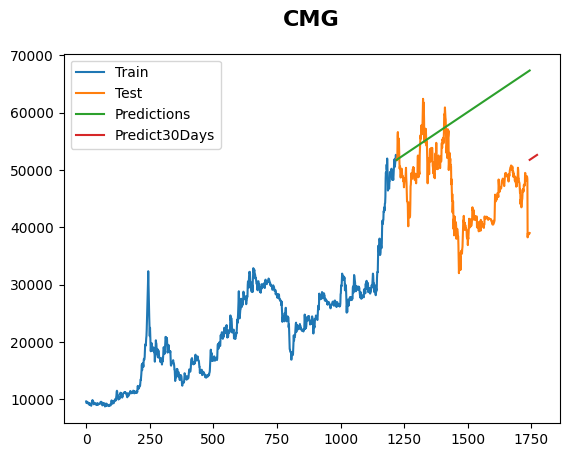

In [10]:
# 6. Draw
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Predict30Days'])
plt.title('CMG', fontweight='bold', fontsize=16, pad=20)
plt.show()

## **TRAIN - TEST: 9 : 1**

---



In [17]:
# 1. split data into train, test sets with a ratio of 9:1
train_size = int(0.9 * len(data))
test_size =len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [ ]:
# 2. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25498.979, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25498.306, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25498.291, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25498.037, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25497.275, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25496.984, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25496.970, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=25495.010, Time=0.36 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=25496.962, Time=0.56 sec


In [ ]:
# 3. Testing proccess
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [ ]:
# 4. The process of creating index predicts the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

In [ ]:
# 5. Evaluate the accuracy of testing
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
test_rmse = np.sqrt(MSE(y_test, y_pred))
test_mape = MAPE(y_test, y_pred)*100
test_mae = MAE(y_test, y_pred)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

In [ ]:
# 6.Draw
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Predict30Days'])
plt.title('CMG', fontweight='bold', fontsize=16, pad=20)
plt.show()